In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [2]:
# generators
train_directory = r'C:/Users/AHM ISRAFIL/Documents/ANACONDA/OCR Bangla/data/train'
val_directory = r'C:/Users/AHM ISRAFIL/Documents/ANACONDA/OCR Bangla/data/test'

# Create image datasets from directories
train_ds = keras.utils.image_dataset_from_directory(
    directory=train_directory,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=val_directory,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 57964 files belonging to 122 classes.
Found 17675 files belonging to 122 classes.


In [3]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential([
    # Input layer
    layers.Input(shape=(256, 256, 3)),

    # Convolutional layers
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer
    layers.Flatten(),

    # Dense layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    layers.Dense(122, activation='softmax')  # Output layer with 122 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Since labels are integers
              metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
1812/1812 [==============================] - 1895s 1s/step - loss: 3.0029 - accuracy: 0.2810 - val_loss: 1.4398 - val_accuracy: 0.6452
Epoch 2/5
1812/1812 [==============================] - 1897s 1s/step - loss: 1.9637 - accuracy: 0.4737 - val_loss: 1.1761 - val_accuracy: 0.7144
Epoch 3/5
1812/1812 [==============================] - 1937s 1s/step - loss: 1.6879 - accuracy: 0.5321 - val_loss: 1.0280 - val_accuracy: 0.7282
Epoch 4/5
1812/1812 [==============================] - 1910s 1s/step - loss: 1.5017 - accuracy: 0.5729 - val_loss: 0.9795 - val_accuracy: 0.7375
Epoch 5/5
1812/1812 [==============================] - 1934s 1s/step - loss: 1.3419 - accuracy: 0.6093 - val_loss: 0.9352 - val_accuracy: 0.7455


In [7]:
history = model.fit(train_ds, epochs=9, validation_data=validation_ds, initial_epoch=5)


Epoch 6/9
1812/1812 [==============================] - 1903s 1s/step - loss: 1.2114 - accuracy: 0.6410 - val_loss: 0.9025 - val_accuracy: 0.7602
Epoch 7/9
1812/1812 [==============================] - 1901s 1s/step - loss: 1.0973 - accuracy: 0.6703 - val_loss: 0.9058 - val_accuracy: 0.7576
Epoch 8/9
1812/1812 [==============================] - 1903s 1s/step - loss: 1.0027 - accuracy: 0.6916 - val_loss: 0.9119 - val_accuracy: 0.7584
Epoch 9/9
1812/1812 [==============================] - 1897s 1s/step - loss: 0.9264 - accuracy: 0.7110 - val_loss: 0.9146 - val_accuracy: 0.7592


In [8]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds, initial_epoch=9)

Epoch 10/10
1812/1812 [==============================] - 1923s 1s/step - loss: 0.8637 - accuracy: 0.7295 - val_loss: 0.9252 - val_accuracy: 0.7627


In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict labels for the validation dataset
y_pred = np.argmax(model.predict(validation_ds), axis=-1)

# Get true labels from the validation dataset
y_true = validation_ds.map(lambda x, y: y).unbatch()

# Collect true labels as a NumPy array
y_true = next(iter(y_true.batch(len(y_pred)))).numpy()

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

print(conf_matrix)


553/553 [==============================] - 129s 232ms/step
[[0 4 0 ... 0 0 1]
 [0 1 2 ... 0 1 0]
 [2 1 1 ... 4 2 1]
 ...
 [0 1 0 ... 1 1 0]
 [1 1 4 ... 0 1 3]
 [0 1 2 ... 0 0 1]]


553/553 [==============================] - 126s 227ms/step


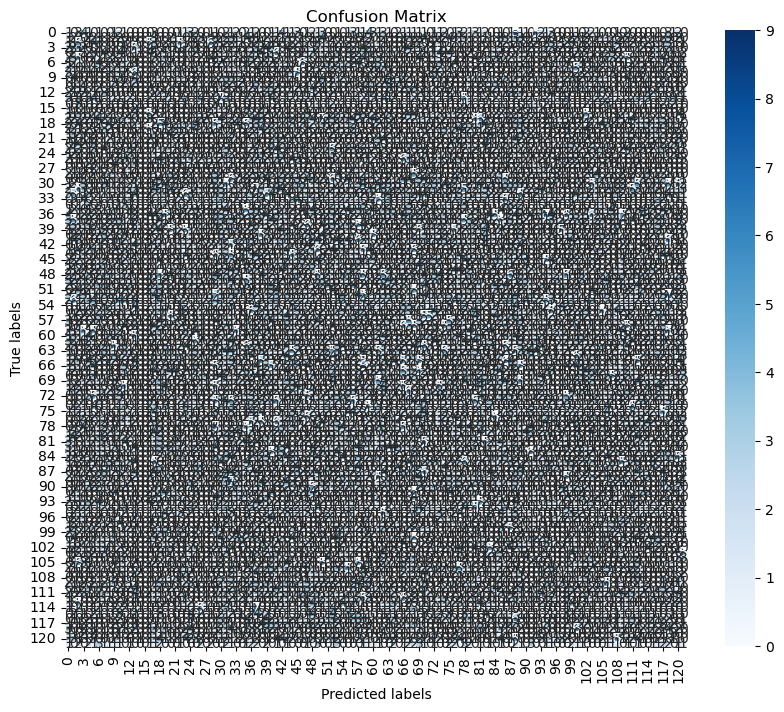

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict labels for the validation dataset
y_pred = np.argmax(model.predict(validation_ds), axis=-1)

# Get true labels from the validation dataset
y_true = validation_ds.map(lambda x, y: y).unbatch()

# Collect true labels as a NumPy array
y_true = next(iter(y_true.batch(len(y_pred)))).numpy()

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


In [14]:
from sklearn.metrics import classification_report

# Predict labels for the validation dataset
y_pred = np.argmax(model.predict(validation_ds), axis=-1)

# Get true labels from the validation dataset
y_true = validation_ds.map(lambda x, y: y).unbatch()

# Collect true labels as a NumPy array
y_true = next(iter(y_true.batch(len(y_pred)))).numpy()

# Generate classification report
report = classification_report(y_true, y_pred)

print(report)


553/553 [==============================] - 133s 240ms/step
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       137
           1       0.01      0.01      0.01       164
           2       0.00      0.00      0.00       161
           3       0.02      0.01      0.01       143
           4       0.00      0.00      0.00       153
           5       0.01      0.01      0.01       162
           6       0.01      0.02      0.02       130
           7       0.01      0.01      0.01       129
           8       0.01      0.01      0.01       105
           9       0.01      0.01      0.01       136
          10       0.01      0.01      0.01       123
          11       0.01      0.02      0.02       110
          12       0.01      0.01      0.01       105
          13       0.01      0.01      0.01       156
          14       0.00      0.00      0.00        66
          15       0.00      0.00      0.00        42
          16       0.0

In [15]:
# for saving the model.
# from tensorflow.keras.models import load_model
model.save("model_new.h5") #replace model.h5 with ocr_v1.h5
print("Saved model to disk")

Saved model to disk
